In [21]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

In [22]:
import utilities as util

In [32]:
def note_position(a):
    notes = {'A':9, 'A#':10, 'B':11, 'C':0, 'C#':1, 'D':2, 
             'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8}
    note = notes[a[:-1]]
    scale = int(a[-1])
    return note + scale*12

def note_distance(a, b):
    return note_position(b)-note_position(a)

def frequencies(start, stop, A4=440):
    import numpy as np
    a = 2**(1/12)
    return a ** np.arange(note_distance('A4', start), note_distance('A4', stop)) * A4

def note_names(start, stop):
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    
    note = notes.index(start[:-1])
    scale = int(start[-1])
    
    stop_note = notes.index(stop[:-1])
    stop_scale = int(stop[-1])
    
    output = []
    
    while scale < stop_scale or (scale == stop_scale and note < stop_note):
        output.append(notes[note] + str(scale))
        note += 1
        if note >= len(notes):
            note = 0
            scale += 1
        
    return output

In [23]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')

In [24]:
wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano = wav_piano.astype(np.double)

In [25]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)

In [44]:
arg_part = np.argpartition(spectrogram_guitar, -2, axis=0)

In [119]:
arg_sort = np.argsort(spectrogram_guitar, axis=0)

In [46]:
arg_sort

array([[6758, 7407, 8185, ..., 8027, 3346, 4743],
       [8150, 7966, 8175, ..., 7509, 1095, 5672],
       [6161, 8110, 6907, ..., 7520, 2515, 4555],
       ...,
       [  12,  185,  185, ...,  185,    1,    2],
       [  56, 1115, 1115, ...,  187,    3,    4],
       [  11,  186,  186, ...,  186,    2,    1]])

In [101]:
vals = []
for x in arg_sort:
    vals.append(arg_sort[x][0])

In [59]:
note_freq = frequencies('C0', 'C8')

In [60]:
note_freq

array([  16.35159783,   17.32391444,   18.35404799,   19.44543648,
         20.60172231,   21.82676446,   23.12465142,   24.49971475,
         25.9565436 ,   27.5       ,   29.13523509,   30.86770633,
         32.70319566,   34.64782887,   36.70809599,   38.89087297,
         41.20344461,   43.65352893,   46.24930284,   48.9994295 ,
         51.9130872 ,   55.        ,   58.27047019,   61.73541266,
         65.40639133,   69.29565774,   73.41619198,   77.78174593,
         82.40688923,   87.30705786,   92.49860568,   97.998859  ,
        103.82617439,  110.        ,  116.54094038,  123.47082531,
        130.81278265,  138.59131549,  146.83238396,  155.56349186,
        164.81377846,  174.61411572,  184.99721136,  195.99771799,
        207.65234879,  220.        ,  233.08188076,  246.94165063,
        261.6255653 ,  277.18263098,  293.66476792,  311.12698372,
        329.62755691,  349.22823143,  369.99442271,  391.99543598,
        415.30469758,  440.        ,  466.16376152,  493.88330

In [66]:
note_freq = frequencies('C0', 'C8')
diff = []
for i in range(len(note_freq)-1):
    diff.append(abs(note_freq[i] - note_freq[i+1]))

In [67]:
diff

[0.9723166047670873,
 1.0301335587834686,
 1.0913884877920808,
 1.1562858244243124,
 1.2250421575083728,
 1.2978869549144036,
 1.3750633293821792,
 1.4568288498872377,
 1.5434564012534295,
 1.6352350948806134,
 1.7324712336271375,
 1.8354893340670664,
 1.9446332095341816,
 2.06026711756693,
 2.1827769755841686,
 2.3125716488486248,
 2.4500843150167384,
 2.5957739098288144,
 2.7501266587643585,
 2.9136576997744754,
 3.086912802506859,
 3.270470189761241,
 3.464942467254261,
 3.670978668134154,
 3.8892664190683632,
 4.12053423513386,
 4.365553951168323,
 4.625143297697264,
 4.900168630033491,
 5.191547819657629,
 5.500253317528717,
 5.827315399548965,
 6.173825605013704,
 6.540940379522482,
 6.929884934508536,
 7.341957336268294,
 7.7785328381367265,
 8.24106847026772,
 8.731107902336703,
 9.250286595394499,
 9.800337260066982,
 10.383095639315258,
 11.000506635057434,
 11.65463079909793,
 12.347651210027436,
 13.081880759044992,
 13.8597698690171,
 14.683914672536531,
 15.55706567627351

In [96]:
vals

[array([2297, 2763, 1045, 1834, 2846, 1292, 4194, 2007, 2072, 1597, 3221,
        1259, 1828, 1309]),
 array([1298,  555, 1671,  932, 1119, 1486, 3346, 3346,  192, 3346,  192,
        1120,  768,   54]),
 array([2378, 2203, 1032,  614, 1987,  640, 2869, 3919, 3243, 1664, 1087,
        2854, 2418, 6651]),
 array([ 892, 1696, 3227, 3567, 1334, 1479, 1259, 1632, 1197, 3837, 1755,
         761,  412, 7854]),
 array([1173, 1167, 3149, 1299, 1194, 1092, 3482,  717,  937, 3349, 1422,
        4278,  716, 7625]),
 array([4137, 5016,  252,  779, 4398, 1390, 2376, 3855, 4320, 2218, 2609,
        4826, 8093, 5781]),
 array([2975, 4675, 2143, 4340, 2104, 1528, 3940, 1159, 3971, 2054, 3273,
        2353, 7690,  471]),
 array([3370, 1209, 3789,  919, 2242, 1391, 1516, 2117, 3539, 3176, 1428,
        2935, 1332,  334]),
 array([2051, 4089, 2048, 2787,  560,  934, 1120, 3162, 3717, 1404, 1676,
        1305,  170,   51]),
 array([2509, 4673, 3931, 2265, 2098, 3227, 2961, 2766, 4595,   17,  252,
        

In [88]:
for i, notef in iter(note_freq):
    dif = diff[i]
    for val in vals[i]:
        if ((val - notef) <= float(dif/2)):
            print("VAL", val)
            print("DIF", dif)
            print('notef', notef)

TypeError: 'numpy.float64' object is not iterable

In [94]:
i = 0
for notef in np.nditer(note_freq):
    dif = diff[i%len(diff)]
    i+=1
    j=0
    for val in vals[j]:
        j+=1
        if (abs(val - notef) <= float(dif/2)):
            print("VAL", val)
            print("DIF", dif)
            print('notef', notef)

VAL 1045
DIF 62.22826270509404
notef 1046.5022612023952
VAL 1259
DIF 74.00229276315622
notef 1244.5079348883246
VAL 1292
DIF 78.40269808053608
notef 1318.5102276514808
VAL 1309
DIF 78.40269808053608
notef 1318.5102276514808
VAL 1597
DIF 93.23704639278344
notef 1567.9817439269987
VAL 1834
DIF 110.8781589521368
notef 1864.6550460723618
VAL 1828
DIF 110.8781589521368
notef 1864.6550460723618
VAL 2007
DIF 117.4713173802927
notef 1975.5332050244986
VAL 2072
DIF 124.45652541018808
notef 2093.0045224047913
VAL 2297
DIF 139.69772643738725
notef 2349.3181433392633
VAL 2763
DIF 166.12953022904458
notef 2793.8258514640347
VAL 2846
DIF 166.12953022904458
notef 2793.8258514640347
VAL 3221
DIF 186.47409278556688
notef 3135.963487853999


In [100]:
spectrogram_guitar

array([[3.66554448e-09, 1.54795184e-06, 3.24582859e-06, ...,
        4.30606777e-04, 5.88737859e-04, 7.80206743e-04],
       [2.21427755e-08, 1.90809477e-06, 1.41563135e-05, ...,
        4.87723008e-04, 6.71842199e-04, 8.24610927e-04],
       [2.40103043e-08, 2.64350516e-06, 1.51280299e-05, ...,
        5.31573784e-04, 6.98714635e-04, 8.39561390e-04],
       ...,
       [5.48231702e-01, 2.48433425e+00, 2.83580514e+00, ...,
        4.44877178e+04, 5.79035975e+04, 9.64502699e+04],
       [8.00370862e-01, 2.74702445e+00, 4.28198135e+00, ...,
        9.81731623e+04, 1.00251759e+05, 1.28919165e+05],
       [1.31151770e+00, 2.78072396e+00, 4.94399301e+00, ...,
        4.17927253e+05, 4.21197575e+05, 4.51755874e+05]])

In [118]:
new_args = arg_sort
new_args.sort()

differ = [y - x for x, y in zip(*[iter(new_args)] * 2)]
avg = sum(differ) / len(differ)

m = [[new_args[0]]]

for x in new_args[1:][0]:
    if x - m[-1][0] < avg:
        m[-1].append(x)
    else:
        m.append([x])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [116]:
m

[[array([3346, 4743, 6758, 7069, 7407, 7565, 7672, 7842, 7953, 8009, 8027,
         8117, 8185, 8192])]]

In [117]:
x

4743

In [114]:
new_args

array([[3346, 4743, 6758, ..., 8117, 8185, 8192],
       [1095, 5672, 6982, ..., 8092, 8150, 8175],
       [2515, 4555, 6161, ..., 8180, 8191, 8192],
       ...,
       [   1,    2,   12, ...,  185,  372,  372],
       [   3,    4,   56, ..., 1115, 1115, 1115],
       [   1,    2,   11, ...,  186,  186,  186]])

In [102]:
vals

[array([2297, 2763, 1045, 1834, 2846, 1292, 4194, 2007, 2072, 1597, 3221,
        1259, 1828, 1309]),
 array([1298,  555, 1671,  932, 1119, 1486, 3346, 3346,  192, 3346,  192,
        1120,  768,   54]),
 array([2378, 2203, 1032,  614, 1987,  640, 2869, 3919, 3243, 1664, 1087,
        2854, 2418, 6651]),
 array([ 892, 1696, 3227, 3567, 1334, 1479, 1259, 1632, 1197, 3837, 1755,
         761,  412, 7854]),
 array([1173, 1167, 3149, 1299, 1194, 1092, 3482,  717,  937, 3349, 1422,
        4278,  716, 7625]),
 array([4137, 5016,  252,  779, 4398, 1390, 2376, 3855, 4320, 2218, 2609,
        4826, 8093, 5781]),
 array([2975, 4675, 2143, 4340, 2104, 1528, 3940, 1159, 3971, 2054, 3273,
        2353, 7690,  471]),
 array([3370, 1209, 3789,  919, 2242, 1391, 1516, 2117, 3539, 3176, 1428,
        2935, 1332,  334]),
 array([2051, 4089, 2048, 2787,  560,  934, 1120, 3162, 3717, 1404, 1676,
        1305,  170,   51]),
 array([2509, 4673, 3931, 2265, 2098, 3227, 2961, 2766, 4595,   17,  252,
        

In [89]:
note_freq

array([  16.35159783,   17.32391444,   18.35404799,   19.44543648,
         20.60172231,   21.82676446,   23.12465142,   24.49971475,
         25.9565436 ,   27.5       ,   29.13523509,   30.86770633,
         32.70319566,   34.64782887,   36.70809599,   38.89087297,
         41.20344461,   43.65352893,   46.24930284,   48.9994295 ,
         51.9130872 ,   55.        ,   58.27047019,   61.73541266,
         65.40639133,   69.29565774,   73.41619198,   77.78174593,
         82.40688923,   87.30705786,   92.49860568,   97.998859  ,
        103.82617439,  110.        ,  116.54094038,  123.47082531,
        130.81278265,  138.59131549,  146.83238396,  155.56349186,
        164.81377846,  174.61411572,  184.99721136,  195.99771799,
        207.65234879,  220.        ,  233.08188076,  246.94165063,
        261.6255653 ,  277.18263098,  293.66476792,  311.12698372,
        329.62755691,  349.22823143,  369.99442271,  391.99543598,
        415.30469758,  440.        ,  466.16376152,  493.88330

In [52]:
x = np.array([[0, 3], [4, 2]])

In [53]:
np.argsort(x, axis=0)

array([[0, 1],
       [1, 0]])

In [54]:
np.argsort(x, axis=1)

array([[0, 1],
       [1, 0]])

In [28]:
arg_max = spectrogram_guitar.argmax(axis=0)
for m in arg_max:
    print(freq_guitar[m])

29.608154296875
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
5.38330078125
2.691650390625


In [29]:
for a,b,c in zip(arg_part[-3], arg_part[-2], arg_part[-1]):
    print(freq_guitar[[a,b,c]])

[ 34.99145508 150.73242188  29.6081543 ]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[   8.07495117 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[1001.29394531 3001.19018555  500.64697266]
[2503.23486328 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[497.95532227 503.33862305 500.64697266]
[2.69165039 8.07495117 5.38330078]
[ 8.07495117 10.76660156  2.69165039]


In [30]:
for x in zip(*arg_sort[-5:]):
    print(freq_guitar[list(x)])

[ 34.99145508  40.37475586  32.29980469 150.73242188  29.6081543 ]
[ 495.26367188 1501.94091797  497.95532227 3001.19018555  500.64697266]
[1499.24926758 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[2002.58789062 1001.29394531  497.95532227 3001.19018555  500.64697266]
[2002.58789062 1001.29394531  497.95532227 3001.19018555  500.64697266]
[2002.58789062  497.95532227 1001.29394531 3001.19018555  500.64697266]
[3003.88183594 2002.58789062 1001.29394531 3001.19018555  500.64697266]
[2500.54321289 1001.29394531  497.95532227 3001.19018555  500.64697266]
[3003.88183594 2002.58789062  497.95532227  503.33862305  500.64697266]
[16.14990234 10.76660156  2.69165039  8.07495117  5.38330078]
[29.6081543   8.07495117  5.38330078 10.76660156  2.69165039]


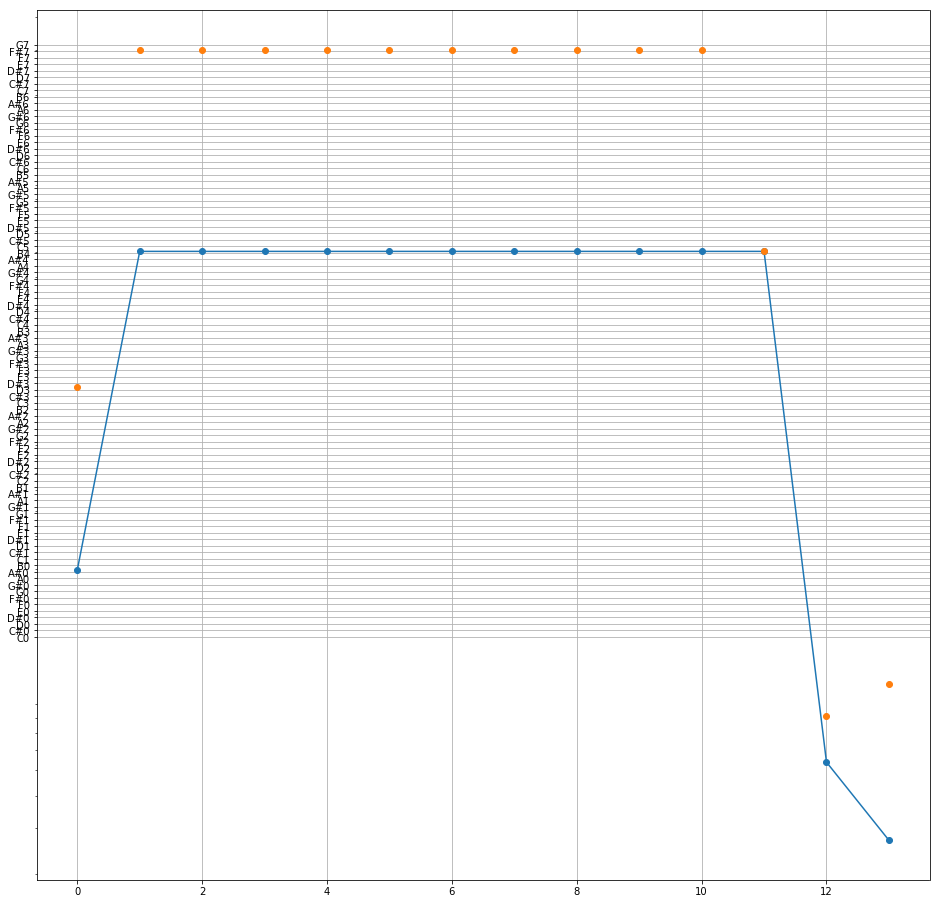

In [41]:
plt.figure(figsize=(16,16))
plt.plot(freq_guitar[spectrogram_guitar.argmax(axis=0)], 'o-')
plt.plot(freq_guitar[arg_sort[-2]], 'o')
#plt.plot(freq_guitar[arg_sort[-3]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C0', 'G#7'),
           note_names('C0', 'G#7'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')
